In [174]:
import pandas as pd
import sqlite3
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [175]:
# viewing data folder

! ls ../unzippedData

ls: ../unzippedData: No such file or directory


In [176]:
# Make Connection to IMDB

### Group Version:
#conn = sqlite3.connect('../unzippedData/im.db')

### Claire Version:
file_path = '/Users/claire/git/flatiron/phase_02/finalproject/DSC-Phase2-Project2/unzippedData/im.db'
conn = sqlite3.connect(file_path)

In [177]:
# Make connection to The Numbers
MovieBudget = pd.read_csv('/Users/claire/git/flatiron/phase_02/finalproject/DSC-Phase2-Project2/unzippedData/tn.movie_budgets.csv.gz')
MovieBudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [178]:
# function for cleaning numbers column

def clean_number_series(Series):
    Series = Series.str.replace(",", "")
    Series = Series.str.replace("$", "")
    Series = Series.astype(int)
    return Series

# function for cleaning Column headers

def clean_column_headers(dataframe):
    dataframe.columns = dataframe.columns.str.title()
    dataframe.columns = dataframe.columns.str.replace("_", " ")
    
# function for cleaning comma seperated string values of a series into list of strings. Accepts one series.

def clean_comma_series(Series):
    Series = Series.str.replace("_", " ")
    Series = Series.str.title()
    Series = Series.str.split(",")
    return Series

In [179]:
# Reformatted Movie Budget

clean_column_headers(MovieBudget)
MovieBudget['Worldwide Gross'] = clean_number_series(MovieBudget['Worldwide Gross'])
MovieBudget['Domestic Gross'] = clean_number_series(MovieBudget['Domestic Gross'])
MovieBudget['Production Budget'] = clean_number_series(MovieBudget['Production Budget'])


In [180]:
# Making Profitability Column and Revenue Budget Ratio Column

MovieBudget['Profitability'] = MovieBudget['Worldwide Gross'] + MovieBudget['Domestic Gross'] - MovieBudget['Production Budget']
MovieBudget['Revenue Budget Ratio'] = (MovieBudget['Worldwide Gross'] + MovieBudget['Domestic Gross']) / MovieBudget['Production Budget']

MovieBudget.head()

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,Revenue Budget Ratio
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,8.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,3.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,0.550071
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,5.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,6.110105


In [181]:
# filtered movies df by date and budget 

MovieBudgetFiltered = MovieBudget[(MovieBudget['Production Budget'] < 40000000) & (MovieBudget['Production Budget'] > 0)]
# MovieBudgetFiltered = MovieBudget.copy()
MovieBudgetFiltered.sort_values('Revenue Budget Ratio', ascending=False, inplace=True)
MovieBudgetFiltered.reset_index(drop=True, inplace=True)
MovieBudgetFiltered[:50]
MovieBudgetFiltered['Release Date'] = MovieBudgetFiltered['Release Date'].str[-4:].astype(int)
MovieBudgetFiltered= MovieBudgetFiltered[(MovieBudgetFiltered['Release Date']>2010)].reset_index(drop=True)
MovieBudgetFiltered['Movie'] = MovieBudgetFiltered['Movie'].str.replace('â', "'")
MovieBudgetFiltered

<ipython-input-181-cb8ebd3dc37c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieBudgetFiltered.sort_values('Revenue Budget Ratio', ascending=False, inplace=True)
<ipython-input-181-cb8ebd3dc37c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieBudgetFiltered['Release Date'] = MovieBudgetFiltered['Release Date'].str[-4:].astype(int)


,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,Revenue Budget Ratio
0,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840
1,12,2012,The Devil Inside,1000000,53262945,101759490,154022435,155.022435
2,90,2014,God's Not Dead,1150000,60755732,63777092,123382824,108.289412
3,63,2011,Insidious,1500000,54009150,99870886,152380036,102.586691
4,14,2015,Unfriended,1000000,32789645,64364198,96153843,97.153843
...,...,...,...,...,...,...,...,...
1366,31,2012,Dysfunctional Friends,1800000,0,0,-1800000,0.000000
1367,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000
1368,33,2014,Against the Wild,1800000,0,0,-1800000,0.000000
1369,34,2015,Beginner's Guide to Sex,1800000,0,0,-1800000,0.000000


In [182]:
# Connecting to Movie Basics Table where genres reside

movie_basics_query = """ 
    SELECT *
    FROM movie_basics
"""

movie_basics_df = pd.read_sql(movie_basics_query, conn)
clean_column_headers(movie_basics_df)
movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
movie_basics_df
movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
movie_genres_df = movie_genres_df.transpose()
movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
movie_genres_df = movie_genres_df.drop_duplicates('Movie')
movie_genres_df

,Movie,Genres
0,Sunghursh,"[Action, Crime, Drama]"
1,One Day Before the Rainy Season,"[Biography, Drama]"
2,The Other Side of the Wind,[Drama]
3,Sabse Bada Sukh,"[Comedy, Drama]"
4,The Wandering Soap Opera,"[Comedy, Drama, Fantasy]"
...,...,...
146139,Kuambil Lagi Hatiku,[Drama]
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,[Documentary]
146141,Dankyavar Danka,[Comedy]
146142,6 Gunn,None


In [183]:
# merged data sets

Merged_df = MovieBudgetFiltered.merge(movie_genres_df, on = 'Movie', how='left')
Merged_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,Revenue Budget Ratio,Genres
0,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,"[Horror, Mystery, Thriller]"
1,12,2012,The Devil Inside,1000000,53262945,101759490,154022435,155.022435,[Horror]
2,90,2014,God's Not Dead,1150000,60755732,63777092,123382824,108.289412,[Drama]
3,63,2011,Insidious,1500000,54009150,99870886,152380036,102.586691,"[Horror, Mystery, Thriller]"
4,14,2015,Unfriended,1000000,32789645,64364198,96153843,97.153843,"[Horror, Mystery, Thriller]"
...,...,...,...,...,...,...,...,...,...
1366,31,2012,Dysfunctional Friends,1800000,0,0,-1800000,0.000000,"[Comedy, Drama]"
1367,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000,"[Action, Adventure, Sci-Fi]"
1368,33,2014,Against the Wild,1800000,0,0,-1800000,0.000000,NaN
1369,34,2015,Beginner's Guide to Sex,1800000,0,0,-1800000,0.000000,NaN


In [184]:
# Explode Datasets

# Merged_df = MovieBudgetFiltered.merge(movie_genres_df, on = 'Movie', how='left')
# Merged_df

MergedExploded_df = Merged_df.explode('Genres')
# MergedExploded_df.dropna(subset='Genres', inplace=True)
# MergedExploded_df.dropna(subset='Genres', inplace=True)

MergedExploded_df

,Id,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profitability,Revenue Budget Ratio,Genres
0,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Horror
0,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Mystery
0,80,2015,The Gallows,100000,22764410,41656474,64320884,644.208840,Thriller
1,12,2012,The Devil Inside,1000000,53262945,101759490,154022435,155.022435,Horror
2,90,2014,God's Not Dead,1150000,60755732,63777092,123382824,108.289412,Drama
...,...,...,...,...,...,...,...,...,...
1367,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000,Adventure
1367,32,2013,Independence Daysaster,1800000,0,0,-1800000,0.000000,Sci-Fi
1368,33,2014,Against the Wild,1800000,0,0,-1800000,0.000000,NaN
1369,34,2015,Beginner's Guide to Sex,1800000,0,0,-1800000,0.000000,NaN


In [185]:
MergedExploded_df['Genres'].value_counts()

Drama          670
Comedy         364
Thriller       222
Horror         193
Action         181
Crime          181
Romance        175
Biography      120
Mystery        107
Adventure       98
Documentary     75
Sci-Fi          68
Fantasy         49
Music           45
Family          44
History         40
Sport           25
Animation       20
War             16
Western          7
Musical          5
Name: Genres, dtype: int64

In [186]:
MergedExploded_df['Genres'].value_counts()

Drama          670
Comedy         364
Thriller       222
Horror         193
Action         181
Crime          181
Romance        175
Biography      120
Mystery        107
Adventure       98
Documentary     75
Sci-Fi          68
Fantasy         49
Music           45
Family          44
History         40
Sport           25
Animation       20
War             16
Western          7
Musical          5
Name: Genres, dtype: int64

In [187]:
MergedExploded_df.groupby(by='Genres').mean()['Revenue Budget Ratio'].sort_values(ascending=False)

Genres
Mystery        16.774148
Horror         12.531501
Thriller        9.236694
Romance         5.747197
Fantasy         5.587984
Sport           5.164131
Music           4.923096
Comedy          4.844508
Biography       4.550153
Drama           4.502411
Documentary     4.482812
Sci-Fi          4.063247
Family          3.686138
Adventure       3.247263
History         3.144099
Animation       3.105989
Action          3.069599
Crime           2.704589
Musical         1.352733
War             1.137655
Western         0.715507
Name: Revenue Budget Ratio, dtype: float64

In [188]:
MergedExploded_df.groupby(by='Genres').mean()['Profitability'].sort_values(ascending=False)

Genres
Music          6.626336e+07
Mystery        6.009524e+07
Comedy         5.533360e+07
Romance        5.205300e+07
Horror         5.156195e+07
Biography      4.634570e+07
Family         4.585542e+07
Thriller       4.515417e+07
Animation      4.258352e+07
History        4.082913e+07
Drama          3.854313e+07
Sport          3.712580e+07
Documentary    3.615716e+07
Adventure      3.556611e+07
Action         3.548393e+07
Fantasy        3.532456e+07
Crime          3.387430e+07
Sci-Fi         3.149418e+07
Musical        8.242480e+06
War            2.066088e+06
Western       -5.420757e+06
Name: Profitability, dtype: float64

In [189]:
MergedExploded_df.groupby(by='Genres').mean()['Production Budget'].sort_values(ascending=False)

Genres
Animation      2.047500e+07
Action         1.659475e+07
Adventure      1.642200e+07
Biography      1.629242e+07
Crime          1.577976e+07
History        1.562000e+07
Family         1.416875e+07
War            1.353125e+07
Comedy         1.341310e+07
Romance        1.339901e+07
Sport          1.331500e+07
Drama          1.255294e+07
Fantasy        1.248571e+07
Music          1.183933e+07
Thriller       1.128816e+07
Mystery        1.060269e+07
Western        1.035714e+07
Sci-Fi         9.985211e+06
Horror         8.335729e+06
Documentary    6.107640e+06
Musical        2.760000e+06
Name: Production Budget, dtype: float64

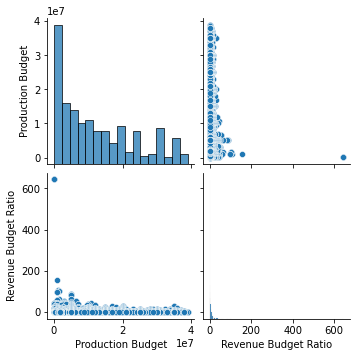

In [190]:
sns.pairplot(MergedExploded_df, vars=[ 'Production Budget', 'Revenue Budget Ratio']);

In [191]:
# ANOVA
res = smf.ols(formula="Profitability ~ C(Genres)", data=MergedExploded_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profitability   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.762
Date:                Wed, 02 Aug 2023   Prob (F-statistic):             0.0194
Time:                        13:59:17   Log-Likelihood:                -53195.
No. Observations:                2705   AIC:                         1.064e+05
Df Residuals:                    2684   BIC:                         1.066e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.548e+07   6.27e+06      5.660      0.000    2.32e+07    4.78e+07
C(Genres)[T.Adventure]    8.218e+04   1.06e+07      0.008      0.994   -2.07e+07    2.08e+07
C(Genres)[T.Animation]      7.1e+06   1.99e+07      0.357      0.721   -3.19e+07    4.61e+07
C(Genres)[T.Biography]    1.086e+07   9.93e+06      1.094      0.274   -8.61e+06    3.03e+07
C(Genres)[T.Comedy]       1.985e+07   7.67e+06      2.588      0.010    4.81e+06    3.49e+07
C(Genres)[T.Crime]        -1.61e+06   8.87e+06     -0.182      0.856    -1.9e+07    1.58e+07
C(Genres)[T.Documentary]  6.732e+05   1.16e+07      0.058      0.954    -2.2e+07    2.34e+07
C(Genres)[T.Drama]        3.059e+06   7.07e+06      0.433      0.665   -1.08e+07    1.69e+07
C(Genres)[T.Family]       1.037e+07   1.42e+07      0.732      0.464   -1.74e+07    3.82e+07
C(Genres)[T.Fantasy]     -1.594e+05   1.36e+07     -0.012      0.991   -2.68e+07    2.65e+07
C(Genres)[T.History]      5.345e+06   1.47e+07      0.363      0.717   -2.36e+07    3.42e+07
C(Genres)[T.Horror]       1.608e+07   8.73e+06      1.842      0.066   -1.03e+06    3.32e+07
C(Genres)[T.Music]        3.078e+07    1.4e+07      2.191      0.029    3.23e+06    5.83e+07
C(Genres)[T.Musical]     -2.724e+07   3.82e+07     -0.712      0.476   -1.02e+08    4.77e+07
C(Genres)[T.Mystery]      2.461e+07   1.03e+07      2.393      0.017    4.44e+06    4.48e+07
C(Genres)[T.Romance]      1.657e+07   8.94e+06      1.853      0.064   -9.65e+05    3.41e+07
C(Genres)[T.Sci-Fi]       -3.99e+06    1.2e+07     -0.333      0.739   -2.75e+07    1.95e+07
C(Genres)[T.Sport]        1.642e+06    1.8e+07      0.091      0.927   -3.36e+07    3.69e+07
C(Genres)[T.Thriller]      9.67e+06   8.45e+06      1.145      0.252   -6.89e+06    2.62e+07
C(Genres)[T.War]         -3.342e+07    2.2e+07     -1.519      0.129   -7.66e+07    9.72e+06
C(Genres)[T.Western]      -4.09e+07   3.25e+07     -1.259      0.208   -1.05e+08    2.28e+07
==============================================================================
Omnibus:                     2016.932   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44417.369
Skew:                           3.344   Prob(JB):                         0.00
Kurtosis:                      21.691   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Clean Persons Table

In [192]:
# Import persons table from IMDB and clean column names

persons_query = """ 
    SELECT *
    FROM persons
"""

persons_df = pd.read_sql(persons_query, conn)

# Clean Column Names
clean_column_headers(persons_df)


In [193]:
persons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Person Id           606648 non-null  object 
 1   Primary Name        606648 non-null  object 
 2   Birth Year          82736 non-null   float64
 3   Death Year          6783 non-null    float64
 4   Primary Profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [194]:
persons_df['Birth Year'].describe()

count    82736.000000
mean      1967.043826
std         22.122190
min          1.000000
25%       1957.000000
50%       1971.000000
75%       1981.000000
max       2014.000000
Name: Birth Year, dtype: float64

In [195]:
persons_df.tail()

,Person Id,Primary Name,Birth Year,Death Year,Primary Profession
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"


In [196]:
# movie_basics_df['Genres'] = clean_comma_series(movie_basics_df['Genres'])
# movie_basics_df
# movie_genres_df = pd.DataFrame([movie_basics_df['Primary Title'], movie_basics_df['Genres']])
# movie_genres_df = movie_genres_df.transpose()
# movie_genres_df.columns = movie_genres_df.columns.str.replace('Primary Title', 'Movie')
# movie_genres_df = movie_genres_df.drop_duplicates('Movie')
# movie_genres_df

In [197]:
persons_df['Primary Profession'] = clean_comma_series(persons_df['Primary Profession'])

In [198]:
persons_df

,Person Id,Primary Name,Birth Year,Death Year,Primary Profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"[Miscellaneous, Production Manager, Producer]"
1,nm0061865,Joseph Bauer,NaN,NaN,"[Composer, Music Department, Sound Department]"
2,nm0062070,Bruce Baum,NaN,NaN,"[Miscellaneous, Actor, Writer]"
3,nm0062195,Axel Baumann,NaN,NaN,"[Camera Department, Cinematographer, Art Depar..."
4,nm0062798,Pete Baxter,NaN,NaN,"[Production Designer, Art Department, Set Deco..."
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,[Actress]
606644,nm9990690,Joo Yeon So,NaN,NaN,[Actress]
606645,nm9991320,Madeline Smith,NaN,NaN,[Actress]
606646,nm9991786,Michelle Modigliani,NaN,NaN,[Producer]


In [199]:
# Explode Datasets

# persons_Merged_df = MovieBudgetFiltered.merge(persons_df, on = 'Movie', how='left')
#persons_Merged_df

# PersonsExploded_df = persons_Merged_df.explode('Primary Profession')
# MergedExploded_df.dropna(subset='Genres', inplace=True)
# MergedExploded_df.dropna(subset='Genres', inplace=True)

# PersonsExploded_df